# Practical 5
#### [ ID: 17CE016 ]
---
#### Aim: Text Classification using Naïve Bayes, SVM and Evaluating Classification Models

#### Theory:
**1. Naïve Bayes Classifier**
- The naïve Bayes classifier is founded on Bayesian probability, which originated from Reverend Thomas Bayes. Bayesian probability incorporates the concept of conditional probability, the probabilty of event A given that event B has occurred [denoted as P(A|B)P(A|B)]. In the context of our attrition data, we are seeking the probability of an employee belonging to attrition class CkCk (where Cyes=attrition and Cno=non-attrition) given that its predictor values are x1,x2,…,xpx1,x2,…,xp. This can be written as P(Ck|x1,…,xp)P(Ck|x1,…,xp).
- The Bayesian formula for calculating this probability is<br>
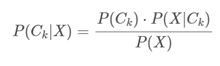

    Where
    - P(Ck)  is the prior probability of the outcome. Essentially, based on the historical data, what is the probability of an employee attriting or not. As we saw in the above section preparing our training and test sets, our prior probability of an employee attriting was about 16% and the probability of not attriting was about 84%.
    - P(X)P(X) is the probability of the predictor variables (same as  P(Ck|x1,…,xp) P(Ck|x1,…,xp)). Essentially, based on the historical data, what is the probability of each observed combination of predictor variables. When new data comes in, this becomes our evidence.
    - P(X|Ck)P(X|Ck) is the conditional probability or likelihood. Essentially, for each class of the response variable (i.e. attrit or not attrit), what is the probability of observing the predictor values.
    - P(Ck|X)P(Ck|X) is called our posterior probability. By combining our observed information, we are updating our a priori information on probabilities to compute a posterior probability that an observation has class CkCk.


**2. Support Vector Machine**

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.
To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.

---

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
#nltk.download('stopwords')  #For First Time
from nltk.stem import PorterStemmer
porter = PorterStemmer()
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kirtan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [7]:
df=pd.read_excel("dataset\Data_Train.xlsx")

In [9]:
df.head()

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ‘...",1
4,"In global markets, gold prices edged up today ...",3


In [10]:
df.isnull().sum()

STORY      0
SECTION    0
dtype: int64

In [11]:
df.STORY=df.STORY.apply(lambda x:re.sub(r"[^A-Za-z]"," ",x))

In [12]:
def clean_data(row):
    tokens=row.split()
    word_list=[]
    for x in tokens:
        x=porter.stem(x.lower())
        if (x not in stop_words) and len(x)>2:
            word_list.append(x.lower())
    return (" ".join(word_list))   

In [13]:
df['story']=df.STORY.apply(lambda x:clean_data(x))

In [14]:
df.head()

,STORY,SECTION,story
0,But the most painful was the huge reversal in ...,3,pain huge revers fee incom unheard among priva...
1,How formidable is the opposition alliance amon...,0,formid opposit allianc among congress jharkhan...
2,Most Asian currencies were trading lower today...,3,asian currenc trade lower today south korean c...
3,If you want to answer any question click on ...,1,want answer ani question click answer click an...
4,In global markets gold prices edged up today ...,3,global market gold price edg today disappoint ...


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df['story'], 
    df['SECTION'], 
    random_state = 1
)

In [18]:
print("size of training dataset: {0}\nsize of testing dataset: {1}".format(len(X_train),len(X_test)))

size of training dataset: 5721
size of testing dataset: 1907


In [19]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(y_train)
Test_Y = Encoder.fit_transform(y_test)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df['story'])
Train_X_Tfidf = Tfidf_vect.transform(X_train)
Test_X_Tfidf = Tfidf_vect.transform(X_test)

In [24]:
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score: ", accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score:  96.27687467226009


In [25]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score: ", accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score:  97.48295752490823


---
## Conclusion:
In this practical, I learnt that
- Naive Bayes algorithms are mostly used in sentiment analysis, spam filtering, recommendation systems etc. They are fast and easy to implement but their biggest disadvantage is that the requirement of predictors to be independent. In most of the real life cases, the predictors are dependent, this hinders the performance of the classifier.
- The method of support vector machines as an alternative to the conservative logistic regression models was studied and its performance compared on the real credit data sets. Especially in combination with the non-linear kernel, SVM proved itself as a competitive approach and provided a slight edge on top of the logistic regression model.

---